In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# read the training dataset
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


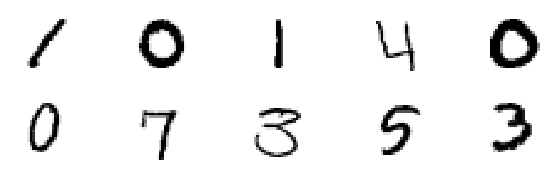

In [6]:
# Visualize train data
plt.figure(figsize=(6,6))
for digit_num in range(0, 10):
    plt.subplot(7,5,digit_num+1)
    grid_data = train.iloc[digit_num,1:].to_numpy().reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = plt.cm.binary)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Create feature & target columns - X as pixels - y as labels
X = train.drop('label', axis=1)
y = train['label']

# Since we have 784 columns (785 - label column), the picture is the size of 28x28
# Thus we reshape the data to 28x28
X = X.values.reshape(-1, 28, 28, 1)

# Also rescale the pixel values from 0-255 to 0-1
X = X/255.0

# Create training and testing partitions
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, 
                                                  random_state = 10)

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,            # set input mean to 0 over the dataset
        samplewise_center=False,             # set each sample mean to 0
        featurewise_std_normalization=False, # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,                 # dimesion reduction
        rotation_range=5,                    # randomly rotate images in the range 5 degrees
        zoom_range = 0.1,                    # Randomly zoom image 10%
        width_shift_range=0.1,               # randomly shift images horizontally 10%
        height_shift_range=0.1,              # randomly shift images vertically 10%
        horizontal_flip=False,               # randomly flip images
        vertical_flip=False                  # randomly flip images
)

datagen.fit(X_train)

In [9]:
# Define an accuracy callback
class myAccuracyCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.995:
                # Stop training once we reach 99.5% accuracy
                self.model.stop_training = True

In [10]:
# Build model
# Instantiate the callback class
accuracyCallbacks = myAccuracyCallback()

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             ) 

# Fit the model adding the callback and save the training history
history = model.fit(datagen.flow(X_train, y_train, batch_size=300), 
                    validation_data=(X_val, y_val), 
                    steps_per_epoch=len(X_train)/300,
                    epochs=50,
                    callbacks=[accuracyCallbacks]
                   )

Epoch 1/50
112/112 [==============================] - 110s 965ms/step - loss: 1.3638 - accuracy: 0.5147 - val_loss: 0.1747 - val_accuracy: 0.9515
Epoch 2/50
112/112 [==============================] - 107s 959ms/step - loss: 0.3504 - accuracy: 0.9038 - val_loss: 0.0772 - val_accuracy: 0.9774
Epoch 3/50
112/112 [==============================] - 108s 961ms/step - loss: 0.2083 - accuracy: 0.9474 - val_loss: 0.0661 - val_accuracy: 0.9812
Epoch 4/50
112/112 [==============================] - 107s 960ms/step - loss: 0.1684 - accuracy: 0.9613 - val_loss: 0.0496 - val_accuracy: 0.9870
Epoch 5/50
112/112 [==============================] - 108s 964ms/step - loss: 0.1332 - accuracy: 0.9693 - val_loss: 0.0413 - val_accuracy: 0.9889
Epoch 6/50
112/112 [==============================] - 107s 953ms/step - loss: 0.1147 - accuracy: 0.9743 - val_loss: 0.0370 - val_accuracy: 0.9904
Epoch 7/50
112/112 [==============================] - 108s 961ms/step - loss: 0.1090 - accuracy: 0.9768 - val_loss: 0.0359 -

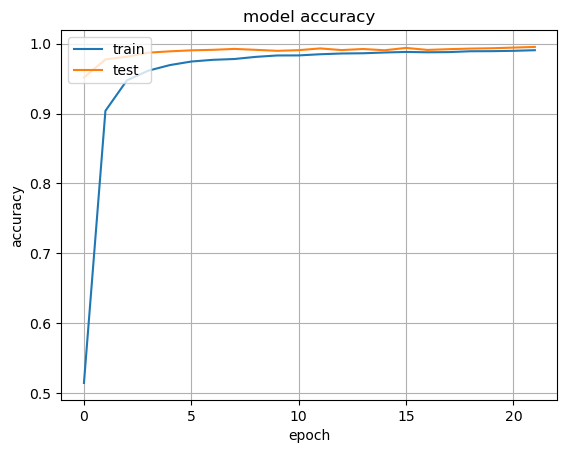

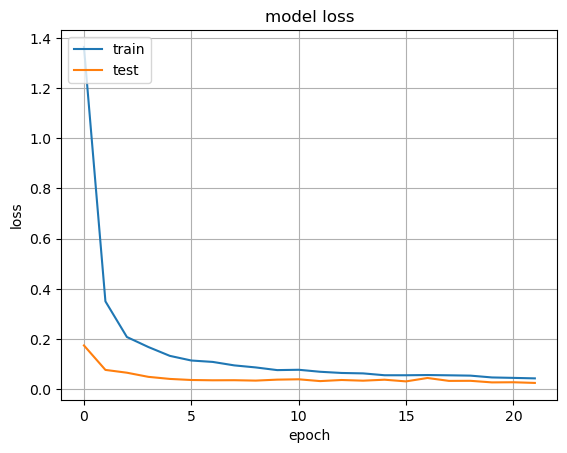

In [11]:
# Evaluate accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Evaluate loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [12]:
# Read and process test data
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = test.to_numpy()
X_test = X_test/.255 
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

In [13]:
y_pred = model.predict(X_test)
preds_test = np.argmax(y_pred, axis = 1)

sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
test_id = sample_sub.ImageId.copy()

875/875 [==============================] - 21s 24ms/step


In [14]:
results = pd.Series(preds_test,name="Label")
output = pd.DataFrame({'ImageId': test_id,
                       'Label': preds_test})

output.to_csv('submission.csv', index=False)